## **Libraries**

In [1]:
!pip install wget

In [2]:
import wget

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## **Description**
This homework is based on the `Laptop prices`dataset from Kaggle. Its goal is th derive a regression model for the variavel `final price`.

In [3]:
# Getting the dataset
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

# The wget command was executed on Google Colab, that is why the `!` is required.

--2024-10-07 19:50:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.9’

laptops.csv.9       100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-07 19:50:33 (7.52 MB/s) - ‘laptops.csv.9’ saved [298573/298573]



In [4]:
df = pd.read_csv('laptops.csv')

In [5]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


All variable in the dataframe are of the categorical type with the excpetion of `final_price`.

In [10]:
base = ['brand', 'cpu', 'ram', 'storage', 'screen']

for var in base:
    print(f'Number of options for {var}: ', len(df[var].unique()))

Number of options for brand:  27
Number of options for cpu:  28
Number of options for ram:  9
Number of options for storage:  12
Number of options for screen:  30


## **Studying the categorical variables**


In [11]:
df.brand.value_counts().head()

,count
brand,
asus,415
hp,368
lenovo,366
msi,308
acer,137


In [12]:
df.cpu.value_counts().head()

,count
cpu,
intel_core_i7,710
intel_core_i5,535
amd_ryzen_7,156
intel_core_i3,130
amd_ryzen_5,127


In [13]:
df.ram.value_counts().head()

,count
ram,
16,928
8,817
32,301
4,68
64,25


In [14]:
df.storage.value_counts().head()

,count
storage,
512,941
1000,570
256,450
128,67
2000,42


In [15]:
df.screen.value_counts().head()

,count
screen,
15.6,1009
14.0,392
16.0,174
17.3,161
13.3,131


In [16]:
df.screen.median()

15.6

## **Histogram**
Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

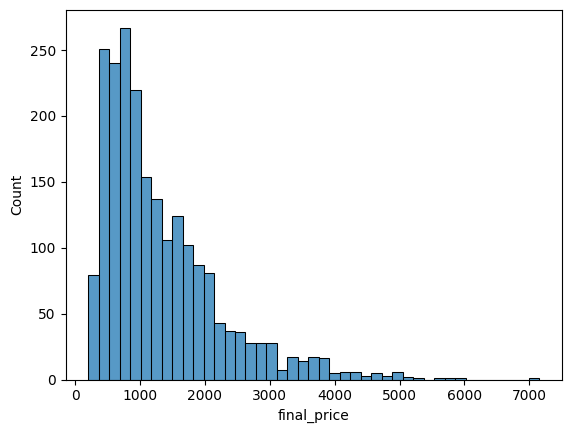

In [17]:
sns.histplot(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

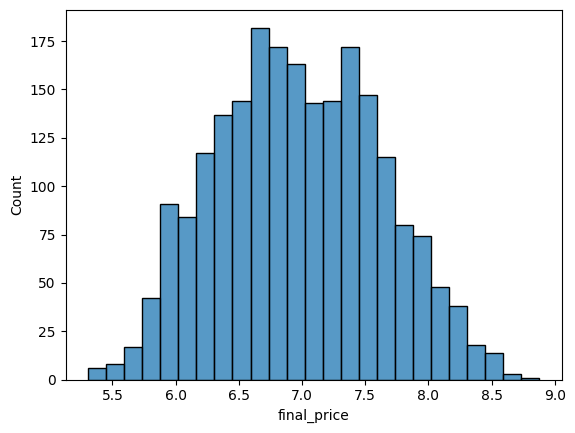

In [18]:
log_final_price = np.log1p(df.final_price)
sns.histplot(log_final_price)

In [19]:
df.final_price.describe()

,final_price
count,2160.000000
mean,1312.638509
std,911.475417
min,201.050000
25%,661.082500
50%,1031.945000
75%,1708.970000
max,7150.470000


As one may notice in the above graph and pandas description, the variable `final_price` is left skewed. Most data concentrates in the interval ]200.0, 3.000,0[. There is a significant tail, hence, one might think that given the range of `final_price` a log transformation is not necessary. Nonetheless, the `log1p` histogram displays a distribution that is very similar to normal.

## **Question 1**
There's one column with missing values. What is it?

* `ram`
* `storage`
* `screen`
* `final_price`

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [21]:
df.isna().sum()

,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


Amidst the four option given, `screen` is the only variable with absent values.

## **Question 2**

What's the median (50% percentile) for variable 'ram'?

* 8
* 16
* 24
* 32

In [22]:
df.ram.median()

16.0

In [23]:
df.ram.describe()

,ram
count,2160.000000
mean,15.413889
std,9.867815
min,4.000000
25%,8.000000
50%,16.000000
75%,16.000000
max,128.000000


## **Prepare and split the dataset**

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [24]:
n = len(df)

In [25]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [26]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [27]:
df_shuffled = df.iloc[idx]

In [28]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [29]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [30]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## **Question 3**

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [31]:
# Function for training
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [32]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [33]:
'''
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
'''

'\ndef prepare_X(df):\n    df = df.copy() \n    features = base.copy()\n    df_num = df[features]\n    df_num = df_num.fillna(0)\n    X = df_num.values\n\n    return X\n'

In [34]:
# base = ['brand', 'cpu', 'ram', 'storage', 'screen']
# brands = ['asus', 'hp', 'lenovo', 'msi', 'acer']
# cpus = ['intel_core_i7', 'intel_core_i5', 'amd_ryzen_7', 'intel_core_i3', 'amd_ryzen_5']
# rams = [4, 8, 16, 32, 64]
# storages = [128, 256, 512, 1000, 2000]
# screens = [13.3, 14.0, 15.6, 16.0, 17.3]

def prepare_X(df):
    df = df.copy()
    features = []

    '''
    for b in ['asus', 'hp', 'lenovo', 'msi', 'acer']:
        feature = 'is_make_%s' % b
        df[feature] = (df['brand'] == b).astype(int)
        features.append(feature)

    for c in ['intel_core_i7', 'intel_core_i5', 'amd_ryzen_7', 'intel_core_i3', 'amd_ryzen_5']:
        feature = 'is_cpu_%s' % c
        df[feature] = (df['cpu'] == c).astype(int)
        features.append(feature)
    '''

    for r in [4, 8, 16, 32, 64]:
        feature = 'is_ram_%s' % r
        df[feature] = (df['ram'] == r).astype(int)
        features.append(feature)

    for s in [128, 256, 512, 1000, 2000]:
        feature = 'is_storage_%s' % s
        df[feature] = (df['storage'] == s).astype(int)
        features.append(feature)

    for sc in [13.3, 14.0, 15.6, 16.0, 17.3]:
        feature = 'is_screen_%s' % sc
        df[feature] = (df['screen'] == sc).astype(int)
        features.append(feature)


    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [35]:
base2 = ['ram', 'storage', 'screen']

### **With zero**

In [36]:
df_zero = df_train[base2]

In [37]:
df_zero.head()

,ram,storage,screen
2079,32,1000,15.6
668,4,64,14.1
2073,32,1000,14.0
1113,16,512,13.3
788,32,1000,16.0


In [38]:
X_train = prepare_X(df_zero)

In [39]:
X_train.shape

(1296, 15)

In [40]:
w_0, w = train_linear_regression(X_train, y_train)

In [41]:
y_pred = w_0 + X_train.dot(w)

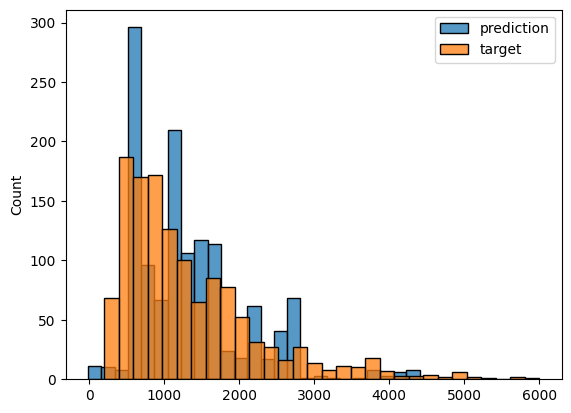

In [42]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [43]:
#Mean squared error for training
round(rmse(y_train, y_pred),2)

559.28

In [44]:
df_zero_val = df_val[base]

In [45]:
X_val = prepare_X(df_zero_val)

In [46]:
y_val_pred = w_0 + X_val.dot(w)

In [47]:
round(rmse(y_val, y_val_pred),2)

535.42

### **With mean**

In [48]:
df_mean = df_train[base2]

In [49]:
df_mean = df_mean.fillna(df_mean.mean())

In [50]:
X_mean = prepare_X(df_mean)
w_0, w = train_linear_regression(X_mean, y_train)
ymean_pred_train = w_0 + X_mean.dot(w)
print('training:', round(rmse(y_train, ymean_pred_train), 2))

training: 559.28


In [51]:
X_mean_val = prepare_X(df_val)
y_mean_pred = w_0 + X_mean_val.dot(w)
print('validation:', round(rmse(y_val, y_mean_pred), 2))

validation: 535.42


## **Question 4**

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

* 0
* 0.01
* 1
* 10
* 100

In [52]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [53]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [54]:
for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

   0.0 535.42
  0.01 535.42
   0.1 535.44
     1 535.61
     5 537.15
    10 540.45
   100 600.5


## **Question 5**

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

* 19.176
* 29.176
* 39.176
* 49.176

In [55]:
def df_shuffle_data(df, seed):

    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [56]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_result = []
for seed in seeds:

    df_train, df_val, df_test, y_train, y_val, y_test = df_shuffle_data(df, seed=seed)

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)

    print('%6s' %seed, round(rmse(y_val, y_pred), 4))
    rmse_result.append(rmse(y_val, y_pred))

     0 525.2086
     1 559.5071
     2 565.0893
     3 538.4799
     4 528.475
     5 531.8501
     6 592.7726
     7 497.5155
     8 559.5949
     9 537.7923


In [57]:
round(np.std(rmse_result), 3)

25.055

## **Question 6**

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 598.60
* 608.60
* 618.60
* 628.60

In [58]:
df_train, df_val, df_test, y_train, y_val, y_test = df_shuffle_data(df, seed=9)

In [59]:
frames = [df_train, df_val]
df_merged = pd.concat(frames)

In [60]:
df_merged = df_merged.fillna(0)

In [61]:
X_merged = prepare_X(df_merged)
X_test = prepare_X(df_test)

In [62]:
y_merged = np.concatenate((y_train, y_val), axis=0)

In [63]:
w_0, w = train_linear_regression_reg(X_merged, y_merged, r=0.001)

In [64]:
ypred = w_0 + X_merged.dot(w)

In [65]:
round(rmse(y_merged, ypred), 4)

542.5139

In [67]:
ypred_test = w_0 + X_test.dot(w)

In [68]:
round(rmse(y_test, ypred_test), 2)

554.07

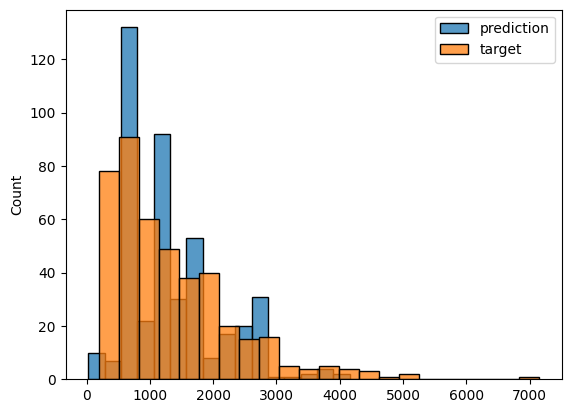

In [70]:
sns.histplot(ypred_test, label='prediction')
sns.histplot(y_test, label='target')
plt.legend()